Please fill out the information of your group!

| <p style="text-align: center;">First Name</p>  | <p style="text-align: center;">Family Name</p> | Matr.-No. |
| ---------------------------------------------- | ---------------------------------------------- | -------- |
| <p style="text-align: left">Lukas</p>| <p style="text-align: left">Kurz</p> | 12007739 |
| <p style="text-align: left">*EDIT!*</p>| <p style="text-align: left">*EDIT!*</p> | *EDIT!* |


## 344.063: Special Topics - Natural Language Processing with Deep Learning (SS2022)

# Assignment 2: Document Classification with Attention and Transformers

<b>Terms of Use</b><br>
This  material is prepared for educational purposes at the Johannes Kepler University (JKU) Linz, and is exclusively provided to the registered students of the mentioned course at JKU. It is strictly forbidden to distribute the current file, the contents of the assignment, and its solution. The use or reproduction of this manuscript is only allowed for educational purposes in non-profit organizations, while in this case, the explicit prior acceptance of the author(s) is required.

**Author:** Navid Rekab-saz<br>
**Email:** navid.rekabsaz@jku.at<br>

### Table of Contents

<ol>
    <a href="#section-general-guidelines"><li style="font-size:large;font-weight:bold">General Guidelines</li></a>
    <a href="#section-classification-attention"><li style="font-size:large;font-weight:bold">Task A: Document Classification with Attention (10 points)</li></a>
    <a href="#section-classification-transformer"><li style="font-size:large;font-weight:bold">Task B: Document Classification with Transformer (10 points)</li></a>
    <a href="#section-classification-bert"><li style="font-size:large;font-weight:bold">Task C: Document Classification with BERT (5 points)</li></a>
    <a href="#section-interpretation"><li style="font-size:large;font-weight:bold">Task D: Interpreting Attention Weights (3 extra points)</li></a>
    
</ol>

### General Guidelines

### Assignment objective

The aim of this assignment is to implement a document (sequence) classification model with PyTorch using Attention networks, Transformers, and BERT. You can/should use the codes implemented in the previous assignment. Main aspects of the deep learning models in this assignment such as preprocessing, dictionary, word embeddings, data batching, loss functions, early stopping, and evaluation are explained in the previous assignment, and **are expected to be fully correct and functional in this assignment**.

The assignment has **25 points** in total as well as **3 overall extra points**. This Notebook encompasses all aspects of the assignment, namely the descriptions of tasks as well as your solutions and reports. Feel free to add any required cell for solutions. The cells can contains code, reports, charts, tables, or any other material, required for the assignment. Feel free to provide the solutions in an interactive and visual way! 

Please discuss any unclear point in the assignment in the provided forum in MOODLE. It is also encouraged to provide answers to your peer's questions. However when submitting a post, keep in mind to avoid providing solutions. Please let the tutor(s) know shall you find any error or unclarity in the assignment.

### Libraries & Dataset

The assignment should be implemented with recent versions of `Python` (>3.7) and `PyTorch` (>1.7). Any standard Python library can be used, so far that the library is free and can be simply installed using `pip` or `conda`. Examples of potentially useful libraries are `transformer`, `scikit-learn`, `numpy`, `scipy`, `gensim`, `nltk`, `spaCy`, and `AllenNLP`. Use the latest stable version of each library.

To conduct the experiments, two datasets are provided. The datasets are taken from the data of `thedeep` project, produced by the DEEP (https://www.thedeep.io) platform. The DEEP is an open-source platform, which aims to facilitate processing of textual data for international humanitarian response organizations. The platform enables the classification of text excerpts, extracted from news and reports into a set of domain specific classes. The provided dataset has 12 classes (labels) like agriculture, health, and protection. 

The difference between the datasets is in their sizes. We refer to these as `medium` and `small`, containing an overall number of 38,000 and 12,000 annotated text excerpts, respectively. Select one of the datasets, and use it for all of the tasks. `medium` provides more data and therefore reflects a more realistic scenario. `small` is however provided for the sake of convenience, particularly if running the experiments on your available hardware takes too long. Using `medium` is generally recommended, but from the point of view of assignment grading, there is no difference between the datasets.

Download the dataset from [this link](https://drive.jku.at/filr/public-link/file-download/0cce88f07f0df27c017f8ea132693d61/38160/1583790728782872458/nlpwdl2022_data.zip).

Whether `medium` or `small`, you will find the following files in the provided zip file:
- `thedeep.$name$.train.txt`: Train set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.validation.txt`: Validation set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.test.txt`: Test set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.label.txt`: Captions of the labels.
- `README.txt`: Terms of use of the dataset.

### Submission

Each group should submit the following two files:

- One Jupyter Notebook file (`.ipynb`), containing all the code, results, visualizations, etc. **In the submitted Notebook, all the results and visualizations should already be present, and can be observed simply by loading the Notebook in a browser.** The Notebook must be self-contained, meaning that (if necessary) one can run all the cells from top to bottom without any error. Do not forget to put in your names and student numbers in the first cell of the Notebook. 
- The HTML file (`.html`) achieved from exporting the Jupyter Notebook to HTML (Download As HTML).

You do not need to include the data files in the submission.

### Publishing Experiments Results

It is encouraged that you log and store any information about the training and evaluation of the models in an ML dashboard like [`TensorBoard`](https://www.tensorflow.org/tensorboard) or [`wandb`](https://wandb.ai/site). This can contain any important aspect of training such as the changes in the evaluation results on validation, training loss, or learning rate. 

To this end, in the case of `TensorBoard`, after finalizing all experiments and cleaning any unnecessary experiment, publish the log files results through [`TensorBoard.dev`](https://tensorboard.dev). A simple way of doing it is by running the following command in the folder of log files:

`tensorboard dev upload --name my_exp --logdir path/to/output_dir`

`TensorBoard.dev` uploads the necessary files and provides a URL to see the TensorBoard's console. Insert the URL in the cell below.

**URL :** *EDIT!*

## Setup

Input processing, libraries, etc. from previous assignment

### Import libraries and set up tensorboard

In [1]:
import os
import re

import numpy as np
import pandas as pd
import torch


# for preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import gensim
import gensim.downloader

from sklearn.feature_extraction.text import CountVectorizer

# for data batching
from torch.utils.data import Dataset, DataLoader
from multiprocessing import Pool, cpu_count
from tqdm.notebook import tqdm

# for model
from torch.nn import Embedding, LSTM, TransformerDecoder, TransformerDecoderLayer
from copy import deepcopy
from torch.nn.functional import one_hot

# for evaluation
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

/home/lukaskurz/miniconda3/envs/hands-on-ai/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
# download the models and data from nltk for preprocessing
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/lukaskurz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/lukaskurz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lukaskurz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# downlaod the word2vec model
word2vec = gensim.downloader.load('word2vec-google-news-300')

In [4]:
# set up tensorboard
from torch.utils.tensorboard import SummaryWriter
result_path = './results/'
writer = SummaryWriter(log_dir=os.path.join(result_path, 'tensorboard'))

## Assignment 1: Input processing

### Preprocessing, Dictionary, and Word Embedding Lookup

#### Read the dataset

We read the train, test and validation splits, along with the labels.
The datasets are returned as pandas Dataframes.

In [5]:
def read_dataset(dataset_base_path = './data/', dataset_size = 'medium'):
    """
    Read the dataset from the given path.
    :param dataset_base_path: the base path of the dataset
    :param dataset_size: the size of the dataset
    """

    training_dataset_path = os.path.join(dataset_base_path, 'thedeep.{}.train.txt'.format(dataset_size))
    validation_dataset_path = os.path.join(dataset_base_path, 'thedeep.{}.validation.txt'.format(dataset_size))
    test_dataset_path = os.path.join(dataset_base_path, 'thedeep.{}.test.txt'.format(dataset_size))
    label_dataset_path = os.path.join(dataset_base_path, 'thedeep.labels.txt'.format(dataset_size))

    training_df = pd.read_csv(training_dataset_path, names=["sentence_id", "text", "label"])
    validation_df = pd.read_csv(validation_dataset_path, names=["sentence_id", "text", "label"])
    test_df = pd.read_csv(test_dataset_path, names=["sentence_id", "text", "label"])
    label_df = pd.read_csv(label_dataset_path, names=["label"])

    return training_df, validation_df, test_df, label_df

In [6]:
training_df, validation_df, test_df, label_df = read_dataset()

training_df.head()

,sentence_id,text,label
0,11609,"• 214,000 students affected as schools close d...",9
1,28291,The primary reported needs for IDPs across the...,4
2,9695,Some 602 000 IDPs are now spread across the co...,3
3,7781,South Sudanese soldiers accused of raping at l...,9
4,31382,"Since the beginning of 2017, 18 882 suspected/...",11


#### Preprocessing and tokenizing

We use the `+foobar+` notation to replace certain words, such as dates and numbers. The `+` sign is compatible with the Lemmatizer from nltk, which is why it was chosen.

In [7]:
def replace_dates(s: str):
    """
    Replace dates with a special token.
    """
    s = re.sub(r'\d{1,2}[\.\,\|\-\_\/\\]\d{1,2}[\.\,\|\-\_\/\\]\d{2,4}', ' +date+ ', s) 
    s = re.sub(r'\d{2,4}[\.\,\|\-\_\/\\]\d{1,2}[\.\,\|\-\_\/\\]\d{1.2}', ' +date+ ', s)
    s = re.sub(r'[1-2]\d{3}', ' +year+ ', s)
    
    return s

def preprocess(s: str):
    """
    Preprocess the given string.
    """
    s = replace_dates(s)
    
    s = re.sub("[+-]?([0-9]*[.,])?[0-9]+", " +num+ ", s)  # escape integers and floats
    s = re.sub('[^a-zA-Z\d\s+]', "", s) # remove non alphanumerics, except for escape char
    s = re.sub('\b[\w]{1}\b', "", s) # remove 1 length words
    s = re.sub('(?<![num|year|date])\+(?!num|year|date\+)', '', s) # match alone standing + signs
    s = s.lower()
    return s

def tokenize(article: str):
    """
    Tokenize the given string.
    """
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in word_tokenize(article) if len(token) > 1 and not token in stop_words]
    
    return tokens

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, article):
        return [self.wnl.lemmatize(t) for t in tokenize(preprocess(article))]

In [8]:
def show_tokenizing_steps(demo_text: str):
    lemma_tokenizer = LemmaTokenizer()

    print('original text: {}\n'.format(demo_text))
    dates_replaces_text = replace_dates(demo_text)
    print('dates replaced: {}\n'.format(dates_replaces_text))
    preprocessed_text = preprocess(demo_text)
    print('preprocessed text: {}\n'.format(preprocessed_text))
    tokenized_text = (' ').join(lemma_tokenizer(preprocessed_text))
    print('tokenized text: {}'.format(tokenized_text))

show_tokenizing_steps(demo_text = training_df.iloc[0]['text'])

original text: • 214,000 students affected as schools close due to insecurity • 65 people killed already in 2018 by improvised explosives• Mass grave uncovered following military violations

dates replaced: • 214,000 students affected as schools close due to insecurity • 65 people killed already in  +year+  by improvised explosives• Mass grave uncovered following military violations

preprocessed text:   +num+  students affected as schools close due to insecurity   +num+  people killed already in  +year+  by improvised explosives mass grave uncovered following military violations

tokenized text: +num+ student affected school close due insecurity +num+ people killed already +year+ improvised explosive mass grave uncovered following military violation


#### Create and reduce dictionary

We create a dictionary from all the feature names in the vectorizer and then use a cut-off threshold to reduce the dictionary size.

In [9]:
def get_dictionary(cut_off_threshold = 0.0001):
    """
    Get the dictionary of the dataset.

    return tuple of (dictionary, reduced_dictionary)
    :param cut_off_threshold: the threshold of the word frequency
    """

    vectorizer = CountVectorizer(preprocessor=preprocess, tokenizer=LemmaTokenizer())
    training_vectorized = vectorizer.fit_transform(training_df['text'])

    word_list = vectorizer.get_feature_names_out()
    count_list = training_vectorized.toarray().sum(axis=0)
    token_dictionary = dict(zip(word_list,count_list))

    word_amount = sum(token_dictionary.values())
    reduced_token_dictionary = {}
    for word in token_dictionary:
        if token_dictionary[word] > word_amount*cut_off_threshold:
            reduced_token_dictionary[word] = token_dictionary[word]
    
    return token_dictionary, reduced_token_dictionary

In [10]:
def show_dictionaries():
    """
    Show the length of the dictionaries, before and after cutoff.
    Might take some seconds to compute.
    """
    full_token_dictionary, reduced_token_dictionary = get_dictionary()
    print('The length of the dictionary is {}'.format(len(full_token_dictionary)))
    print(' '.join(list(full_token_dictionary.keys())[:7]) + ' ...' + ' '.join(list(full_token_dictionary.keys())[-7:]))
    print('The length of the reduced dictionary is {}'.format(len(reduced_token_dictionary)))
    print(' '.join(list(reduced_token_dictionary.keys())[:7]) + ' ...' + ' '.join(list(reduced_token_dictionary.keys())[-7:]))

    return full_token_dictionary, reduced_token_dictionary

_, token_dictionary = show_dictionaries()

The length of the dictionary is 36216
+date+ +num+ +year+ aa aaf aah aal ...zuwara zuwarah zuwaras zuwayed zvulun zwak zwara
The length of the reduced dictionary is 1530
+date+ +num+ +year+ ability able aboveaverage absence ...yet yield yobe young youth zambia zone


#### Map word embeddings to dictionary words

We map the words of the dictionary to their respective word embeddings from `word2vec`.

Out-of-vocabulary tokens are replaced with a random vector

In [11]:
def get_embedding(dictionary: dict):
    """
    Convert the word embedding dict to a matrix and return a torch.Embedding
    :param dictionary: the embedding dictionary
    """
    mean = np.mean(word2vec.vectors)
    std = np.std(word2vec.vectors)
    dictionary_keys = list(dictionary.keys())
    dictionary_keys.insert(0, '+pad+')
    dictionary_keys.insert(1, '+oov+')
    np.random.seed(42069)
    word_lookup = np.zeros(shape=(len(dictionary_keys), word2vec.vector_size))
    for idx, word in enumerate(dictionary_keys):
        if word in word2vec:
            word_lookup[idx] = word2vec[word]
        else:
            word_lookup[idx] = np.random.normal(loc=mean, scale=std, size=word2vec.vector_size)

    return Embedding.from_pretrained(torch.tensor(word_lookup, dtype=torch.float32), freeze=False, padding_idx=0), dictionary_keys

In [12]:
embedding_matrix, dictionary_keys = get_embedding(token_dictionary)
print('dictionary_keys: {}...'.format(', '.join(dictionary_keys[0:10])))
print('embedding_matrix shape: {}'.format(embedding_matrix.weight.shape))

dictionary_keys: +pad+, +oov+, +date+, +num+, +year+, ability, able, aboveaverage, absence, abu...
embedding_matrix shape: torch.Size([1532, 300])


### Data Batching and Forward Pass

#### Create datasets

In [13]:
def map_dict_ids(words: list, dictionary_keys: list):
    """
    Maps a list of words to their respective indexes/ids in the dictionary.
    Out of vocabulary words are skipped/ignored.
    
    :param words: list of strings
    :param dictionary: dictionary of keys
    """
    results = []
    # using a try-catch to account for words not in dictionary is much faster than checking each word with an if
    # since most of the words are found and only a small percentage throws an exception, that needs to be caught
    for word in words:
        try:
            results.append(dictionary_keys.index(word))
        except:
            results.append(dictionary_keys.index('+oov+'))
    
    return results

def transform_document(document: str, dictionary_keys: list, tokenizer: LemmaTokenizer, max_length: int):
    """
    Transform the document to a list of indexes.
    Document is preprocessed and tokenized.
    Then it is either cut or padded to max_length.
    Padding is done with the -1 value, since that matches no token id.
    :param document: the document to be transformed
    :param dictionary_keys: the dictionary keys
    :param tokenizer: the tokenizer
    :param max_length: the max length of the document
    """
    words = tokenizer(document)
    ids = map_dict_ids(words, dictionary_keys)
    cutoff_ids = ids[0:max_length]
    padded_ids = np.pad(cutoff_ids, (0,max_length-len(cutoff_ids)), mode='constant', constant_values=0) # is pad index
    
    return padded_ids

To speed up the creation of the documents, we utilize multi threading. With small dictionary, this is not really relevant, but processing time increased when a bigger dictionary ~ smaller cut-off is chosen.

In [14]:
def transform_document_mp(args):
    """
    Wrapper for transform_document, that accepts the args as a tuple.
    """
    return [transform_document(d, args[2], args[3], args[4]) for d in args[0]], args[1]

def create_arguments(documents: list, labels: list, batch_size: int, dictionary_keys: list, tokenizer: LemmaTokenizer, max_length: int):
    """
    Create the arguments list for the multiprocessing.
    :param documents: the documents to be transformed
    :param labels: the labels of the documents
    :param batch_size: the batch size used for the multiprocessing jobs.
    :param dictionary_keys: the dictionary keys
    :param tokenizer: the tokenizer
    :param max_length: the max length of the output document
    """
    arguments = []
    n = len(documents)
    start = 0
    for end in range(batch_size, n, batch_size):
        arguments_batch = (documents[start:end],labels[start:end], dictionary_keys, tokenizer, max_length)
        arguments.append(arguments_batch)
        start = end
    # if n % batch_size != 0:
    arguments.append((documents[start:],labels[start:], dictionary_keys, tokenizer, max_length))

    return arguments

We wrap all of the above code into a pytorch dataset.

In [15]:
class DocumentsDataset(Dataset):
    def __init__(self, df: pd.DataFrame, max_document_length: int, tokenizer: LemmaTokenizer, dictionary_keys: list, n_jobs = 10, loading_label = 'Transforming Documents'):
        """
        Create a dataset from a pandas dataframe.

        Throws error if n_jobs is bigger than available cpu core count
        :param df: the pandas dataframe
        :param max_document_length: the max length of the documents
        :param tokenizer: the tokenizer
        :param dictionary_keys: the dictionary keys
        :param n_jobs: the number of jobs for the multiprocessing
        """
        if n_jobs > cpu_count():
            raise ValueError('n_jobs must be less than or equal to the number of available CPU cores')        

        transformed_documents = []
        transformed_labels = []
        with tqdm(total=len(df), desc=loading_label) as pbar:
            pool = Pool(processes=n_jobs) 
            documents = df['text'].values
            labels = df['label'].values
            arguments = create_arguments(documents, labels, 300, dictionary_keys, tokenizer, max_document_length)
            for result in pool.imap_unordered(transform_document_mp, arguments):
                pbar.update(len(result[0]))
                transformed_documents.extend(result[0])
                transformed_labels.extend(result[1])
        
        self.documents = torch.tensor(transformed_documents).type(torch.int32)
        self.labels = torch.tensor(transformed_labels).type(torch.int32)
                                   
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self,idx):
        document = self.documents[idx]
        label = self.labels[idx]
        return document, label

In [16]:
def get_datasets(max_document_length: int, tokenizer: LemmaTokenizer, dictionary_keys: list, n_jobs = 10):
    """
    Get the datasets for training, validation and test.
    :param max_document_length: the max length of the documents
    """

    # Define Datasets and create Dataloader
    train_dataset = DocumentsDataset(training_df, max_document_length, tokenizer, dictionary_keys, n_jobs, 'Loading Training Dataset')
    val_dataset = DocumentsDataset(validation_df, max_document_length, tokenizer, dictionary_keys, n_jobs, 'Loading Validation Dataset')
    test_dataset = DocumentsDataset(test_df, max_document_length, tokenizer, dictionary_keys, n_jobs, 'Loading Test Dataset')

    return (train_dataset, val_dataset, test_dataset)

In [17]:
def show_dataset_loading():
    train, val, test = get_datasets(max_document_length = 100, tokenizer = LemmaTokenizer(), dictionary_keys = dictionary_keys, n_jobs = 10)
    print('Training dataset size: {}'.format(len(train)))
    print('Validation dataset size: {}'.format(len(val)))
    print('Test dataset size: {}'.format(len(test)))

show_dataset_loading()

Loading Training Dataset:   0%|          | 0/26600 [00:00<?, ?it/s]

Loading Validation Dataset:   0%|          | 0/5700 [00:00<?, ?it/s]

Loading Test Dataset:   0%|          | 0/5700 [00:00<?, ?it/s]

Training dataset size: 26600
Validation dataset size: 5700
Test dataset size: 5700


#### Create Dataloader

We implement batching using pytorch's dataloaders

In [18]:
def collate_fn(batch):
    """
    Collate function for the dataloader.
    :param batch: the batch
    """
    documents_stacked = torch.zeros(len(batch), len(batch[0][0]), dtype=torch.long)
    labels_stacked = torch.zeros(len(batch), dtype=torch.long)
    for idx, elem in enumerate(batch):
        documents_stacked[idx] = batch[idx][0]
        labels_stacked[idx] = batch[idx][1]
    return documents_stacked, labels_stacked

In [19]:
def get_dataloaders(batch_size: int, max_document_length: int, tokenizer: LemmaTokenizer, dictionary_keys: list, n_jobs = 10):
    """
    Get the dataloaders for training, validation and test.
    :param batch_size: the batch size
    :param max_document_length: the max length of the documents
    :param tokenizer: the tokenizer
    :param dictionary_keys: the dictionary keys
    :param n_jobs: the number of jobs for the multiprocessing of the datasets
    """
    
    train_dataset, test_dataset, val_dataset = get_datasets(max_document_length, tokenizer, dictionary_keys, n_jobs)

    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers = 2, collate_fn=collate_fn)
    test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers = 2, collate_fn=collate_fn)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers = 2, collate_fn=collate_fn)

    return (train_dataloader, test_dataloader, val_dataloader)

### Loss Function, Optimization, Early Stopping, and Evaluation

#### Hyper Params

We create a class to contain all the hyperparams.

Since all the code in the previous steps is wrapped in functions and parameterized, it allows us to easily tune parameters in these steps, without having to re-run the whole notebook.

In [20]:
class Params():
    
    def __init__(self, 
        optimizer: torch.optim.Optimizer,
        device: torch.device, 
        loss_function, 
        num_epochs: int,
        early_stopping_patience: int, 
        batch_size: int,
        max_document_length: int,
        cut_off_threshold: float,
        tokenizer: LemmaTokenizer,
        learning_rate: float,
        weight_decay: float = 1e-6,
        hidden_dim: int = 128,
        num_layers: int = 2,
        dropout: float = 0.2,
        freeze_weights: bool = False,
        random_embedding: bool = False,
        bidirectional: bool = False,
        n_heads: int = 8,
        ):

        self.optimizer = optimizer
        self.device = device
        self.loss_function = loss_function
        self.num_epochs = num_epochs
        self.early_stopping_patience = early_stopping_patience
        self.batch_size = batch_size
        self.max_document_length = max_document_length
        self.cut_off_threshold = cut_off_threshold
        self.tokenizer = tokenizer
        self.learning_rate = learning_rate
        self.weight_decay = weight_decay
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.dropout = dropout
        self.freeze_weights = freeze_weights
        self.random_embedding = random_embedding
        self.bidirectional = bidirectional
        self.n_heads = n_heads

#### Input processing

In [21]:
cached_params = {}

def process_input(params: Params):
    # get the dictionary
    using_cache = False
    if cached_params.get('cut_off_threshold') is None or cached_params.get('cut_off_threshold') != params.cut_off_threshold:
        _, token_dictionary = get_dictionary(params.cut_off_threshold)
    else:
        print('Using cached dictionary')
        using_cache = True
        token_dictionary = cached_params.get('token_dictionary')
    print(f"Number of tokens, with cut-off {params.cut_off_threshold}: {len(token_dictionary)}")

    # get the embedding (not really cacheable, since it's being changed in the training process)
    word_embedding, dictionary_keys = get_embedding(token_dictionary)
    print('word_embedding shape: {}'.format(word_embedding.weight.shape))

    # get the data
    if cached_params.get('batch_size') != params.batch_size \
        or cached_params.get('max_document_length') != params.max_document_length \
            or cached_params.get('dictionary_keys') != dictionary_keys \
                or using_cache == False:
        train_dataloader, validation_dataloader, test_dataloader = get_dataloaders(params.batch_size, params.max_document_length, params.tokenizer, dictionary_keys)
    else:
        print('Using cached dataloaders')
        train_dataloader = cached_params.get('train_dataloader')
        validation_dataloader = cached_params.get('validation_dataloader')
        test_dataloader = cached_params.get('test_dataloader')
    
    # set cached values
    cached_params['cut_off_threshold'] = params.cut_off_threshold
    cached_params['token_dictionary'] = token_dictionary
    cached_params['dictionary_keys'] = dictionary_keys
    cached_params['batch_size'] = params.batch_size
    cached_params['max_document_length'] = params.max_document_length
    cached_params['train_dataloader'] = train_dataloader
    cached_params['validation_dataloader'] = validation_dataloader
    cached_params['test_dataloader'] = test_dataloader
    

    return (train_dataloader, validation_dataloader, test_dataloader, word_embedding)

#### Train and test loop

In [22]:
def train_model(model:torch.nn.Module, dataloader: DataLoader, params: Params):
    model.train()
    train_losses = []
    train_accuracies = []
    for x, y in dataloader:
        params.optimizer.zero_grad()

        x = x.to(params.device)
        y = y.to(params.device)
        
        y_hat = model.forward(x, device=params.device)
        y_hat_idx = torch.argmax(y_hat, axis=1)
        accuracy = (torch.sum(y_hat_idx == y)/len(y))

        # calculate loss 
        loss = params.loss_function(y_hat, y)
        loss.backward()
        params.optimizer.step()

        train_losses.append(loss.item())
        train_accuracies.append(accuracy.item())
    
    return train_losses, train_accuracies

def eval_model(model:torch.nn.Module, dataloader: DataLoader, params: Params):
    model.eval()
    eval_losses = []
    eval_accuracies = []

    with torch.no_grad():
        for x, y in dataloader:
            x = x.to(params.device)
            y = y.to(params.device)
            
            y_hat = model.forward(x, device=params.device)
            y_hat_idx = torch.argmax(y_hat, axis=1)
            accuracy = (torch.sum(y_hat_idx == y)/len(y))

            # calculate loss 
            loss = params.loss_function(y_hat, y)
            eval_losses.append(loss.item())
            eval_accuracies.append(accuracy.item())    
    
    
    return eval_losses, eval_accuracies

#### Final analysis of performance

In [23]:
def get_distribution(array: list, classes: list):
    distribution = {}
    for i in range(len(classes)):
        distribution[classes[i]] = array.count(i)
    return distribution

def show_performance(model, test_dataloader, params):
    y_pred = []
    y_true = []

    model.eval()
    with torch.no_grad():
            for x, y in test_dataloader:
                x = x.to(params.device)
                y = y.to(params.device)
                
                y_hat = model.forward(x, device=params.device)
                y_hat_idx = torch.argmax(y_hat, axis=1)
                y_pred.extend(y_hat_idx.cpu().numpy())
                y_true.extend(y.cpu().numpy())

    # constant for classes
    classes = label_df['label'].values

    # Build confusion matrix
    cf_matrix = confusion_matrix(y_true, y_pred)
    # Supress/hide the warning from true_divide
    np.seterr(invalid='ignore')
    df_cm = pd.DataFrame(np.nan_to_num(cf_matrix/np.sum(cf_matrix, axis=0),0), index = [i for i in classes],
                        columns = [i for i in classes])

    plt.figure(figsize = (36,7))
    ax1 = plt.subplot(1,3,1)
    sns.heatmap(df_cm, annot=True, ax=ax1)
    ax1.set_title('Confusion matrix (normalized over all predictions)')
    ax1.set_ylabel('True Label')
    ax1.set_xlabel('Predicted Label')

    ax2 = plt.subplot(1,3,2)
    dist_1 = get_distribution(y_true, classes)
    ax2.bar(dist_1.keys(), dist_1.values())
    ax2.set_title('True distribution')

    ax3 = plt.subplot(1,3,3)
    dist_2 = get_distribution(y_pred, classes)
    ax3.bar(dist_2.keys(), dist_2.values())
    ax3.set_title('Predicted distribution')

    plt.show()

In [24]:
def train_and_eval(model: torch.nn.Module, train_dataloader:DataLoader, validation_dataloader: DataLoader, test_dataloader: DataLoader, params: Params):
    torch.manual_seed(42069)
    # used for early stopping
    best_accuracy = 0
    best_model = None
    patience = params.early_stopping_patience

    pbar = tqdm(range(params.num_epochs))
    try:
        for epoch in pbar:
            ### train ###
            train_losses, train_accuracies = train_model(model, train_dataloader, params)
            
            # tensorboard reporting
            train_loss = np.mean(train_losses)
            writer.add_scalar(tag="training/loss", scalar_value=train_loss, global_step=epoch)
            train_accuracy = np.mean(train_accuracies)
            writer.add_scalar(tag="training/acc", scalar_value=train_accuracy, global_step=epoch)

            ### eval ###
            val_losses, val_accuracies = eval_model(model, validation_dataloader, params)

            # tensorboard reporting
            val_loss = np.mean(val_losses)
            writer.add_scalar(tag="validation/loss", scalar_value=val_loss, global_step=epoch)
            val_accuracy = np.mean(val_accuracies)
            writer.add_scalar(tag="validation/acc", scalar_value=val_accuracy, global_step=epoch)
            
            # early stopping
            if val_accuracy > best_accuracy:
                patience = params.early_stopping_patience
                best_accuracy = val_accuracy
                best_model = deepcopy(model.state_dict())
            else:
                patience -= 1
            
            if patience == 0:
                print("Early stopping")
                model.load_state_dict(best_model)
                break

            # progress bar indication
            pbar.set_description(f'Epoch {epoch+1}/{params.num_epochs}')
            pbar.set_postfix(train_loss=train_loss, train_accuracy=train_accuracy, val_loss=val_loss, val_accuracy=val_accuracy)
    except KeyboardInterrupt:
        print("Manual stopping")
        if(best_model is not None):
            model.load_state_dict(best_model)
    

    show_performance(model, test_dataloader, params)

    return best_accuracy

## Task A: Document Classification with Attention (10 points)

This task implements a document classification model using Attention networks. The model is called **`ClassificationAttentionModel`** in the code, containing all various variants as explained later. The basic architecture of `ClassificationAttentionModel` is shown in the figure below.

<img src="attachment:att_model.png" alt="Drawing" style="width: 290px;"/>

The implementation of the basic architecture of `ClassificationAttentionModel` should cover the following points:

**Baseline model**  

- **Embeddings & RNN Layer (1 points).** The baseline model first fetches the corresponding embeddings of the word IDs of a given batch. Next, a bidirectional LSTM/GRU layer is applied to the word embeddings. The hidden states of this RNN model can be seen as the contextual embeddings of the underlying word embeddings, and will be used in the next layer instead of the original word embeddings.

- **Attention Layer (4 points).** To create the Attention layer, implement an attention network that satisfies the needs of the assignment, i.e. masking as explained in the following. While it is suggested that you implement this attention network by yourself from scratch, you are allowed to use any available implementation of (single-head) attention networks. Among various implementations, the only ones that you are **NOT allowed** to use in this task are the ones based on multi-heads like `torch.nn.MultiheadAttention`. In the baseline architecture, the Attention network must be the (single-head) basic dot-product. Query vector is defined in the model initialization as *a vector of learnable parameters*, whose values will be learned together with the other model's parameters during training. The hidden states of the previous layer are passed as the values (and keys) to the Attention layer, where the Query vector is the query of the Attention. An important point in the forward pass of the Attention layer is setting correct padding masks. These should mask out the attention weights of the padded tokens of each batch. The masks excludes the corresponding vectors of these padded tokens from the calculations in Attention. If the mask is not passed correctly, the padded items will be counted in the Softmax of the Attention layer, and influence other attention weights. A sign that it is working correctly is that final attention weights of the corresponding vectors of the padded tokens are equal to zero. 

- **Prediction Layer (1 points).** The output of the Attention layer for each batch is the corresponding document embedding, passed to the decoder layer (a linear projection) and softmax to predict the probability distribution of the output classes.

- **General model functionality (1 points).** 


**Model variations:** Implement the **two variations** of the baseline model as explained below. Each variation applies only one change to the baseline architecture, making it possible to study the effect of the change. The code of all variations should be inside `ClassificationAttentionModel`, and executing a variation should be done by simply passing the corresponding parameters of the variation to the model. 

- **No RNN (1 point).** Run the model without the RNN layer.

- **Attention Type (1 point).** Implement another type of single-head Attention other than basic dot-product.

**Reporting and discussion (1 point).** Report the evaluation results of the baseline model, as well as the ones for all the variations in a table and also in a plot. Discuss which variation(s) appear to be the most effective. Explain your take.


## Task B: Document Classification with Transformer (10 points)

This task implements a document classification model using Transformer Decoder. This model is called **`ClassificationTransformerModel`** in the code, containing all various variants as explained later. 

The implementation of the basic architecture of `ClassificationTransformerModel` covers the following points:

**Baseline model:** The architecture of baseline `ClassificationTransformerModel`is the exactly the same as the one of `ClassificationAttentionModel`. The only difference is that `ClassificationTransformerModel` replaces the Attention layer with a Transformer Decoder. 

- **Transformer Decoder (3 points).** Use `torch.nn.TransformerDecoder` class or any other implementation of Transformer Decoder. The baseline model consists of one layer of Transformer Decoder and is defined with default parameters of Transformer Decoder. As before, Query vector is defined separately, and used as the query of the Transformer.

- **Model Functionality (1 point).**

**Model variations:** Implement the **two variations** of the baseline model as explained below. Each variation applies only one change to the baseline architecture, making it possible to study the effect of the change. The code of all variations should be inside `ClassificationTransformerModel`, and executing a variation should be done by simply passing the corresponding parameters of the variation to the model. 

- **Transformer Encoder (3 point).** Replace the RNN layer with a Transformer Encoder. Similar to the RNN, the aim of this layer is to provide contextual embeddings of the input word embeddings. 

- **Number of heads (1 point).** Study the effect of increasing/decreasing the number of heads of the Transformer Decoder.

- **Number of layers (1 point).** Study the effect of increasing the layers of the Transformer Decoder.


**Reporting and discussion (1 point).** Report the evaluation results of the baseline model, as well as the ones for all the variations in a table and also in a plot. Discuss which variation(s) appear to be the most effective. Explain your take.

### Define Model

In [28]:
class ClassificationTransformerModel(torch.nn.Module):
        def __init__(self, embedding: torch.nn.Embedding, hidden_dim: int, n_labels: list, num_layers: int = 1, num_heads: int = 8, bidirectional: bool = True):
            super(ClassificationTransformerModel, self).__init__()
            self.hidden_dim = hidden_dim
            self.n_labels = n_labels
            self.num_layers = num_layers
            self.num_heads = num_heads

            self.embedding = embedding

            self.direction_count = 2 if bidirectional else 1
            
            self.lstm = LSTM(word2vec.vector_size, hidden_dim, num_layers=1, batch_first=True, bidirectional=bidirectional)
            self.decoder_layer = TransformerDecoderLayer(d_model=hidden_dim*self.direction_count, nhead=num_heads)
            self.transformer_decoder = TransformerDecoder(self.decoder_layer, num_layers=num_layers)
            self.linear = torch.nn.Linear(self.direction_count*hidden_dim,n_labels)
            self.softmax = torch.nn.Softmax(dim = 1)
            self.query = torch.nn.Parameter(torch.randn(1, 1, hidden_dim*self.direction_count))
        
        def forward(self, x, device):
            batch_size = x.shape[0] # account for variable batch size
            sequence_length = x.shape[1] # account for variable sequence length
            padding_mask = torch.zeros(batch_size, sequence_length, dtype=torch.bool).to(device)
            padding_mask = padding_mask.masked_fill(x == 0, True)
            # get embeddings
            embeddings = self.embedding(x)            

            # initialize hidden state
            h_i = torch.zeros(self.direction_count, batch_size, self.hidden_dim, device=device)
            a_i = torch.zeros(self.direction_count, batch_size, self.hidden_dim, device=device)
            # get all hidden states for the sequences
            hidden_states = torch.zeros(sequence_length, batch_size, self.hidden_dim*self.direction_count, device=device) # sequence, batch, hidden_dim*directions
            # step through each sequence
            for i in range(sequence_length):
                _, (h_i, a_i) = self.lstm(embeddings[:,i:i+1,:], (h_i, a_i))
                hidden_states[i,:,:] = torch.clone(h_i.view(1, batch_size, self.hidden_dim*self.direction_count))
            
            tgt = self.query.repeat(1,batch_size,1)
            out = self.transformer_decoder(tgt, hidden_states, memory_key_padding_mask=padding_mask)
            out = out.view(batch_size, -1)
            out = self.linear(out)
            out = self.softmax(out)

            return out

In [26]:
class ClassificationRNNModel(torch.nn.Module):
        def __init__(self, embedding: torch.nn.Embedding, hidden_dim: int, n_labels: list, drop_out = 0.0, num_layers: int = 1, freeze_embedding: bool = False, random_init: bool = False, bidirectional: bool = False):
            super(ClassificationRNNModel, self).__init__()
            self.hidden_dim = hidden_dim
            self.embedding = embedding
            self.lstm = LSTM(word2vec.vector_size, hidden_dim, num_layers=1, batch_first=True, bidirectional=False)
            self.linear = torch.nn.Linear(hidden_dim*35,n_labels)
            self.softmax = torch.nn.Softmax(dim = 1)
        
        def forward(self, x, device):
            batch_size = x.shape[0] # account for variable batch size
            sequence_length = x.shape[1] # account for variable sequence length
            embeddings = self.embedding(x)
            # _, (h_n, _) = self.lstm(embeddings)
            # h_n = h_n.view(h_n.shape[1], -1)

            # initialize hidden state
            h_i = torch.zeros(1, batch_size, self.hidden_dim, device=device)
            a_i = torch.zeros(1, batch_size, self.hidden_dim, device=device)
            # get all hidden states for the sequences
            hidden_states = torch.zeros(sequence_length, batch_size, self.hidden_dim, device=device) # sequence, batch, hidden_dim*directions
            # step through each sequence
            for i in range(sequence_length):
                _, (h_i, a_i) = self.lstm(embeddings[:,i:i+1,:], (h_i, a_i))
                hidden_states[i,:,:] = torch.clone(h_i.view(1, batch_size, self.hidden_dim))

            # d = self.linear(h_n)
            hidden_states = hidden_states.view(batch_size, -1)
            d = self.linear(hidden_states)
            d = self.softmax(d)
            return d

### Execution

Using cached dictionary
Number of tokens, with cut-off 1e-06: 22152
word_embedding shape: torch.Size([22154, 300])
Using cached dataloaders


  0%|          | 0/60 [00:00<?, ?it/s]

Early stopping


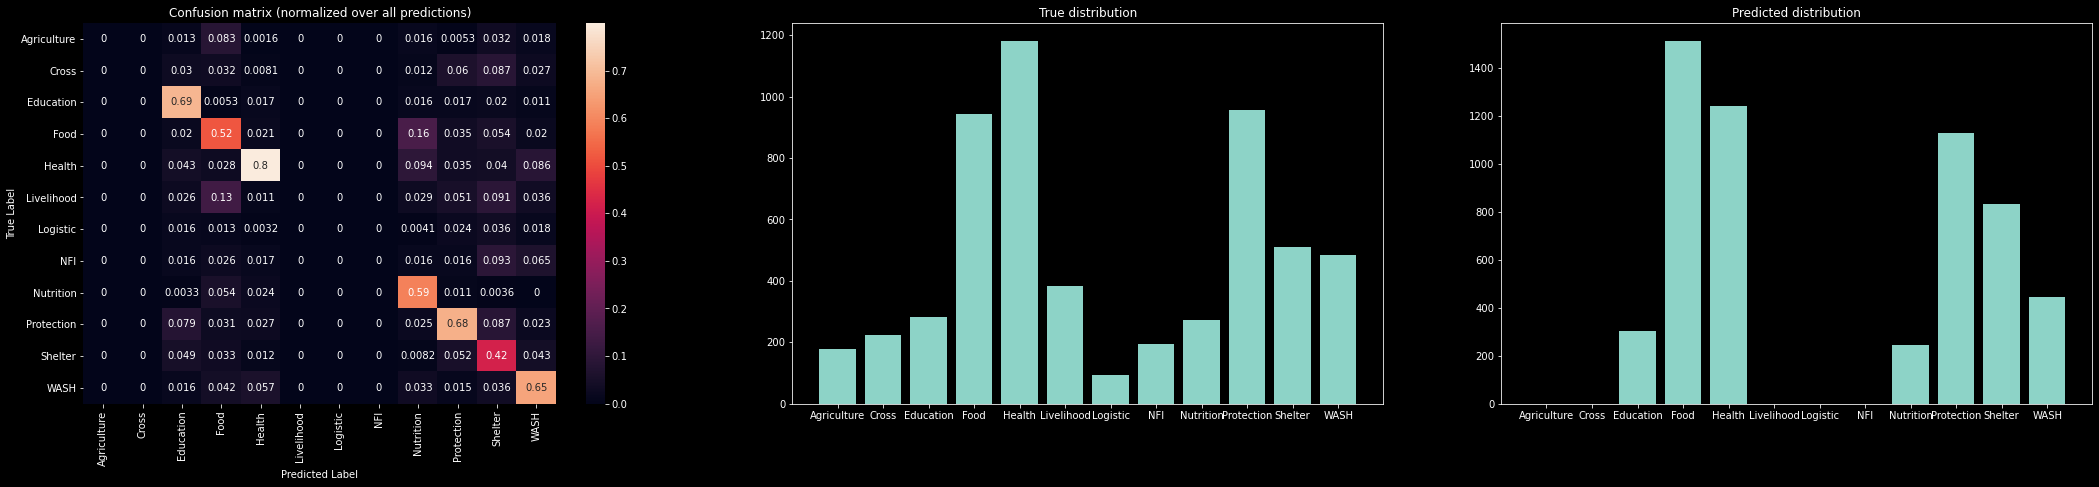

Best validation accuracy: 0.62175439397494


In [31]:
params = Params(
        tokenizer=LemmaTokenizer(),
        cut_off_threshold = 1e-6,
        max_document_length=40,
        batch_size=10,
        num_epochs=60, 
        early_stopping_patience=10, 
        learning_rate=1e-4,
        hidden_dim=128,
        optimizer=torch.optim.Adam, 
        device=torch.device("cuda" if torch.cuda.is_available() else "cpu"),
        loss_function=torch.nn.NLLLoss(),
        n_heads=8,
        num_layers=1,
        bidirectional=False,
    )

train_dataloader, validation_dataloader, test_dataloader, word_embedding = process_input(params)

# classes = label_df['label'].values
# y_true = []
# for x,y in train_dataloader:
#     y_true.extend(y.tolist())

# dict = get_distribution(y_true, classes)
# distr = np.array(list(dict.values()))
# distr = distr/distr.sum()

# loss_function=torch.nn.NLLLoss(weight=torch.tensor(distr, dtype=torch.float,device=params.device))

# get the model
model = ClassificationTransformerModel(word_embedding.to(params.device), params.hidden_dim, len(label_df), bidirectional=params.bidirectional, num_layers=params.num_layers, num_heads=params.n_heads).to(params.device)

# set optimizer
params.optimizer = params.optimizer(model.parameters(), lr=params.learning_rate)

# train and val
best_accuracy = train_and_eval(model, train_dataloader, validation_dataloader, test_dataloader, params)
print(f"Best validation accuracy: {best_accuracy}")

## Task C: Document Classification with BERT (5 points)

This task implements a document classification model using BERT. This model is called **`ClassificationBERTModel`**.

**Model Functionality (4 points):** Use the `transformers` library from `huggingface` to load a (small) pre-trained BERT model for document classification. Select a BERT model according to your available resources. The available models can be found [here](https://huggingface.co/models) and [here](https://github.com/google-research/bert). The weights of the BERT model should be fine-tuned using the available training data of the task. Consult the documentation of `huggingface` for a correct implementation of the classifier. 

**Reporting and discussion (1 point).** Evaluate the model and report the results.

## Task D: Interpreting Attention Weights (3 extra points)

The aim of this task is to provide an interpretation of the functionality of one of the models, by exploring which words have the higher contributions to the prediction results of some specific documents. 

**Attention weights (2.5 extra points):** Select one of the models trained in the previous tasks as you prefer. Select four documents from test set, such that two are correctly and the other two are incorrectly classified by the model. Next, run the forward pass for each of these documents and extract the corresponding attention weights from the model. Separately for each document, interpret the mechanism of the classifier by looking at the words with the highest attention weights. Do these words – in your opinion – provide important information to the predicted class?

**Visualization (0.5 overall extra points):** Visualize the attention weights over document’s words. Some suggested tools and resources:

https://github.com/minqi/hnatt

https://github.com/jiesutd/Text-Attention-Heatmap-Visualization 

https://github.com/cbaziotis/neat-vision